Given a sorted list, create a function convert_to_bst that converts the list into a binary tree. convert_to_bst returns a TreeNode holding the root of the binary tree. A TreeNode is defined as the following:
    
The output binary tree should be balanced, meaning the height difference between the left and right subtrees of all the nodes should be miimized.

In [3]:
from graphviz import Digraph
from IPython.display import display, Image

import random
import numpy as np

In [4]:
class TreeNode:
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right

    def visualize(self):
        dot = Digraph()
        dot.node(name=str(self.value), label=str(self.value))  # Print the root node
        self._add_nodes_edges(dot, self)  # Call the function to add edges and child nodes
        # Generate binary content of the image
        image_binary = dot.pipe(format='png')
        # Display the image in the notebook
        display(Image(image_binary))

    def _add_nodes_edges(self, dot, node):
        if node.left:
            dot.node(name=str(node.left.value), label=str(node.left.value))
            dot.edge(str(node.value), str(node.left.value))
            self._add_nodes_edges(dot, node.left)
        if node.right:
            dot.node(name=str(node.right.value), label=str(node.right.value))
            dot.edge(str(node.value), str(node.right.value))
            self._add_nodes_edges(dot, node.right)


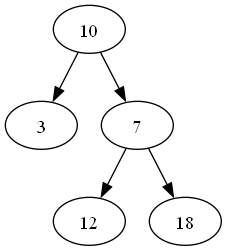

In [5]:
# Example without logic

# Current tree
root_node = TreeNode(value=10)

# Growing the tree by adding more nodes
root_node.left = TreeNode(value=3)
root_node.right = TreeNode(value=7)
root_node.right.left = TreeNode(value=12)
root_node.right.right = TreeNode(value=18)

# Visualize the updated tree
root_node.visualize()


In [53]:
# logic to minimize subtrees difference

random_list = [random.randint(1,99) for _ in range(100)]

In [66]:
def bal_tree(sub_list, is_sorted = False):
    
    if not is_sorted:
        sub_list = sorted(sub_list)
    
    if not sub_list: 
        return None

    ix_node = len(sub_list)//2
    # print('ix_node', ix_node) ############################

    node_value = sub_list[ix_node]
    # print('node_value', node_value) ############################

    next_node = TreeNode(value=node_value)

    left_sublist = sub_list[:ix_node]
    # print('left_sublist len', len(left_sublist)) ############################
    right_sublist = sub_list[ix_node + 1:]
    # print('right_sublist len', len(right_sublist)) ############################

    next_node.left = bal_tree(left_sublist, is_sorted = True)
    next_node.right = bal_tree(right_sublist, is_sorted = True)
        
    return next_node


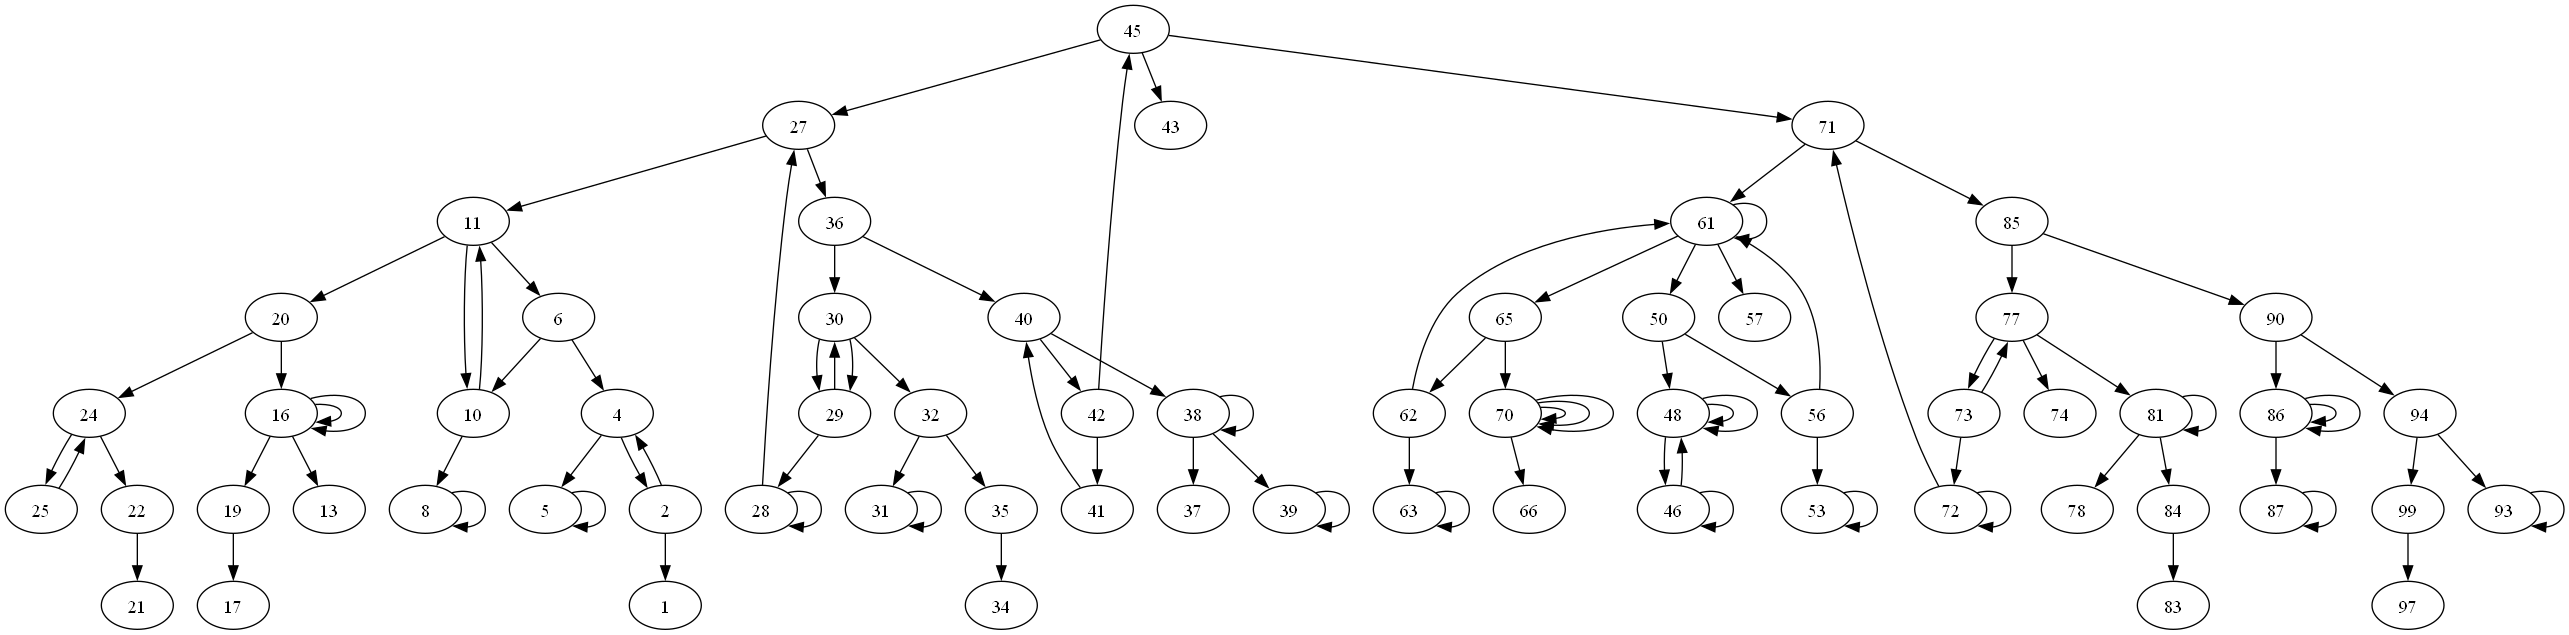

In [67]:
root_node = bal_tree(random_list)
root_node.visualize()

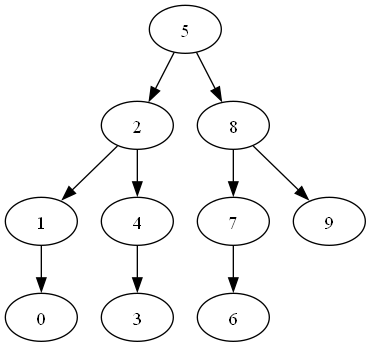

In [68]:
root_node = bal_tree([1,2,3,4,5,6,7,8,9,0])
root_node.visualize()